# heart_disease privbayes stacking

Training on heart_disease dataset using privbayes model and stacking data

In [1]:
# Imports

from synthesizers import Load
from syntheval import SynthEval
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[KeOps] Warning : 
    The default C++ compiler could not be found on your system.
    You need to either define the CXX environment variable or a symlink to the g++ command.
    For example if g++-8 is the command you can do
      import os
      os.environ['CXX'] = 'g++-8'
    
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


Declaring real dataset and splitting into train/test

In [2]:
# Read hearts data
data_real = pd.read_csv("Data\hearts_data.csv")
data_real = data_real.dropna()
gen_method = "privbayes"
target = "target"

In [3]:
# Split hearts data into 80/20 train and test
data_train, data_test = train_test_split(data_real, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv("Data\hearts_train.csv", index=False)
data_test.to_csv("Data\hearts_test.csv", index=False)

In [3]:
data_train = Load("Data\hearts_train.csv")
data_test = Load("Data\hearts_test.csv")

# syn_v1

In [4]:
# Synthesize data
gen_count = data_real.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v1.csv", key="synth")

[2024-05-07T20:40:56.737544+0200][5912][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
Generating for node: resting ecg: 100%|██████████| 12/12 [00:00<00:00, 23.68it/s]


[{'train': Dataset({
    features: ['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope', 'target'],
    num_rows: 952
}), 'test': None, 'synth':       age  sex  chest pain type  resting bp s  cholesterol  \
0      44    1                3           118          328   
1      70    1                2           122          282   
2      52    1                4           128          322   
3      57    1                4           158          287   
4      38    1                4            80          308   
...   ...  ...              ...           ...          ...   
1185   46    1                3           170          168   
1186   57    1                1            96          250   
1187   65    1                1           112          175   
1188   33    1                1           158          208   
1189   67    1                4           158          341   

 

# syn_v2

In [5]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v1.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with real data
data_stack = pd.concat([data_real, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v1.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v1_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v1_test.csv", index=False)


In [6]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v2.csv", key="synth")

[2024-05-07T20:42:54.524247+0200][5912][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
Generating for node: resting ecg: 100%|██████████| 12/12 [00:01<00:00, 11.69it/s]


[{'train':       age  sex  chest pain type  resting bp s  cholesterol  \
2121   67    1                2           127          157   
457    61    1                3           120            0   
1738   59    1                1           174          149   
883    44    1                2           120          263   
2279   57    1                3           126          315   
...   ...  ...              ...           ...          ...   
1638   52    1                2            96          205   
1095   55    1                2           130          262   
1130   61    1                1           134          234   
1294   41    0                4           135          209   
860    62    0                4           140          268   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
2121                    0            0             124                1   
457                     0            0              80                1   
1738               

# syn_v3

In [7]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v2.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v2.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v2_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v2_test.csv", index=False)


In [8]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v3.csv", key="synth")

[2024-05-07T20:51:39.666761+0200][5912][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


Generating for node: ST slope: 100%|██████████| 12/12 [00:01<00:00,  6.35it/s]


[{'train':       age  sex  chest pain type  resting bp s  cholesterol  \
624    59    1                4           110          239   
4522   70    1                4           115          307   
4227   44    1                2           102          249   
3135   64    1                2           134          409   
1554   29    1                2           125          311   
...   ...  ...              ...           ...          ...   
4426   60    1                3           137          180   
466    42    1                3           134          240   
3092   31    0                4           104          160   
3772   58    1                4           146          219   
860    62    0                4           140          268   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
624                     0            2             142                1   
4522                    0            1             106                0   
4227               

# syn_v4

In [9]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v3.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v3.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v3_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v3_test.csv", index=False)

In [10]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v4.csv", key="synth")

[2024-05-07T20:51:53.653343+0200][5912][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
Generating for node: oldpeak: 100%|██████████| 12/12 [00:02<00:00,  5.90it/s]


[{'train':       age  sex  chest pain type  resting bp s  cholesterol  \
2484   49    0                1           142          268   
3016   70    1                1            95          249   
5292   53    1                4           141          192   
7932   48    1                3           172          308   
4734   40    0                2           132          192   
...   ...  ...              ...           ...          ...   
5734   41    1                1           190          349   
5191   70    0                3           156          280   
5390   30    1                3           143          219   
860    62    0                4           140          268   
7270   44    1                1           160          252   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
2484                    0            0              97                0   
3016                    1            0             115                1   
5292               

# syn_v5

In [11]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v4.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v4.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v4_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v4_test.csv", index=False)

In [12]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v5.csv", key="synth")

[2024-05-07T20:52:12.432097+0200][5912][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
Generating for node: cholesterol: 100%|██████████| 12/12 [00:00<00:00, 32.69it/s]


[{'train':        age  sex  chest pain type  resting bp s  cholesterol  \
2006    40    1                4           144          160   
1288    38    1                2           100          167   
18494   43    1                2           180          458   
15527   52    1                3           102          312   
12341   33    1                2           185          310   
...    ...  ...              ...           ...          ...   
11284   58    1                3           174          241   
11964   56    1                2           126          340   
5390    30    1                3           143          219   
860     62    0                4           140          268   
15795   39    1                1           122          217   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
2006                     0            2             145                0   
1288                     0            0             168                0   
1849

# stack_v5 - Final stack

In [13]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v5.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v5.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v5_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v5_test.csv", index=False)

# Train on stack_v5 and save as state

In [14]:
# Train stack_v5 and save as state
state_stack_v5 = Load(data_train).Train(plugin=gen_method)

[2024-05-07T20:52:40.965006+0200][5912][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
100%|██████████| 11/11 [00:51<00:00,  4.66s/it]


# stack_v5 (synth only)

In [15]:
# Remove first 1190 rows, equal to the real data, from stack_v5
data_stack_synth_only = data_stack.iloc[1190:,:]

# Save to csv
data_stack_synth_only.to_csv(f"{gen_method}\hearts_stack_synth_only.csv", index=False)

# Split synth_only stack into 80/20 train and test
data_train, data_test = train_test_split(data_stack_synth_only, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_synth_only_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_synth_only_test.csv", index=False)

# Train on synth_only and save as state

In [16]:
# Train synth_only stack and save as state
state_stack_synth_only = Load(data_train).Train(plugin=gen_method)

[2024-05-07T20:53:32.595762+0200][5912][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
100%|██████████| 11/11 [00:49<00:00,  4.51s/it]


# Generate synth data based on stack_v5

In [17]:
# Synthesize data
gen_count = data_real.shape[0]

state_stack_v5.Generate(count=gen_count).Save(name=f"{gen_method}\stack_v5_syn.csv", key="synth")

Generating for node: target: 100%|██████████| 12/12 [00:00<00:00, 99.45it/s]


[{'train':        age  sex  chest pain type  resting bp s  cholesterol  \
22594   57    1                3           185          329   
1510    29    1                2           185          298   
26995   61    0                2           154          385   
14320   69    1                2           134          339   
34943   77    1                2           180          250   
...    ...  ...              ...           ...          ...   
16850   49    1                2            96          331   
6265    47    1                1            94          177   
11284   58    1                3           174          241   
860     62    0                4           140          268   
15795   39    1                1           122          217   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
22594                    1            1             120                0   
1510                     0            1             124                1   
2699

In [18]:
# Read synthesized data
stack_v5_syn = pd.read_csv(f"{gen_method}\stack_v5_syn.csv").round(1)

# Remove first column
stack_v5_syn = stack_v5_syn.iloc[:, 1:]

# Generate synth data based on synth_only

In [19]:
# Synthesize data
gen_count = data_real.shape[0]

state_stack_synth_only.Generate(count=gen_count).Save(name=f"{gen_method}\stack_synth_only_syn.csv", key="synth")

Generating for node: target: 100%|██████████| 12/12 [00:00<00:00, 114.59it/s]


[{'train':        age  sex  chest pain type  resting bp s  cholesterol  \
19876   74    1                1           125          160   
6191    37    1                4           122          491   
3687    42    1                1           155          284   
1440    48    0                4           200          564   
28826   43    1                4           164          288   
...    ...  ...              ...           ...          ...   
18040   28    1                4           123          347   
7455    38    1                4            96          353   
12474   38    1                1           160          213   
2050    43    0                1           170          269   
16985   48    1                4             0          243   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
19876                    0            0             120                1   
6191                     1            2             132                1   
3687

In [20]:
# Read synthesized data
stack_synth_only_syn = pd.read_csv(f"{gen_method}\stack_synth_only_syn.csv").round(1)

# Remove first column
stack_synth_only_syn = stack_synth_only_syn.iloc[:, 1:]

# Eval on syn_1

In [21]:
# Read train and test data (this is base/real train and test data, not the stack data)
data_train = pd.read_csv("Data\hearts_train.csv")
data_test = pd.read_csv("Data\hearts_test.csv")

# Read syn_v1 data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v1.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_real = S.evaluate(data_syn,target,"full_eval")
res_real

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.041836,0.003499,0.958164,0.003499
1,pca_eigval_diff,u,0.154428,NaN,0.845572,NaN
2,pca_eigvec_ang,u,0.161921,NaN,0.948459,NaN
3,avg_cio,u,0.064730,0.064730,0.064730,0.064730
4,corr_mat_diff,u,1.335652,NaN,0.979763,NaN
5,mutual_inf_diff,u,0.653307,NaN,0.990101,NaN
6,ks_tvd_stat,u,0.163604,0.039990,0.836396,0.039990
7,frac_ks_sigs,u,0.750000,NaN,0.250000,NaN
8,avg_h_dist,u,0.079329,0.039909,0.920671,0.039909
9,avg_pMSE,u,0.059299,0.000918,0.762805,0.003672


# Eval on syn_2

In [22]:
# Read train and test data from stack_v1
data_train = pd.read_csv(f"{gen_method}\hearts_stack_v1_train.csv")
data_test = pd.read_csv(f"{gen_method}\hearts_stack_v1_test.csv")

# Read syn_v2 data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v2.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v1 = S.evaluate(data_syn,target,"full_eval")
res_stack_v1

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.023484,0.002679,0.976516,0.002679
1,pca_eigval_diff,u,0.058266,NaN,0.941734,NaN
2,pca_eigvec_ang,u,1.104287,NaN,0.648494,NaN
3,avg_cio,u,0.000000,0.000000,0.000000,0.000000
4,corr_mat_diff,u,0.485672,NaN,0.992641,NaN
5,mutual_inf_diff,u,0.272219,NaN,0.995875,NaN
6,ks_tvd_stat,u,0.083854,0.017674,0.916146,0.017674
7,frac_ks_sigs,u,0.666667,NaN,0.333333,NaN
8,avg_h_dist,u,0.034521,0.015315,0.965479,0.015315
9,avg_pMSE,u,0.015647,0.000276,0.937410,0.001102


# Eval on syn_3

In [23]:
# Read train and test data from stack_v2
data_train = pd.read_csv(f"{gen_method}\hearts_stack_v2_train.csv")
data_test = pd.read_csv(f"{gen_method}\hearts_stack_v2_test.csv")

# Read syn_v3 data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v3.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v2 = S.evaluate(data_syn,target,"full_eval")
res_stack_v2

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.010810,0.001978,0.989190,0.001978
1,pca_eigval_diff,u,0.021666,NaN,0.978334,NaN
2,pca_eigvec_ang,u,1.480268,NaN,0.528816,NaN
3,avg_cio,u,0.106657,0.106587,0.106657,0.106587
4,corr_mat_diff,u,0.276055,NaN,0.995817,NaN
5,mutual_inf_diff,u,0.216847,NaN,0.996714,NaN
6,ks_tvd_stat,u,0.030300,0.009843,0.969700,0.009843
7,frac_ks_sigs,u,0.416667,NaN,0.583333,NaN
8,avg_h_dist,u,0.007491,0.005868,0.992509,0.005868
9,avg_pMSE,u,0.001725,0.000153,0.993098,0.000611


# Eval on syn_4

In [24]:
# Read train and test data from stack_v3
data_train = pd.read_csv(f"{gen_method}\hearts_stack_v3_train.csv")
data_test = pd.read_csv(f"{gen_method}\hearts_stack_v3_test.csv")

# Read syn_v4 data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v4.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v3 = S.evaluate(data_syn,target,"full_eval")
res_stack_v3

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.007039,0.001414,0.992961,0.001414
1,pca_eigval_diff,u,0.004762,NaN,0.995238,NaN
2,pca_eigvec_ang,u,1.385693,NaN,0.558920,NaN
3,avg_cio,u,0.105229,0.105229,0.105229,0.105229
4,corr_mat_diff,u,0.090580,NaN,0.998628,NaN
5,mutual_inf_diff,u,0.138677,NaN,0.997899,NaN
6,ks_tvd_stat,u,0.012442,0.003549,0.987558,0.003549
7,frac_ks_sigs,u,0.250000,NaN,0.750000,NaN
8,avg_h_dist,u,0.001930,0.000703,0.998070,0.000703
9,avg_pMSE,u,0.000852,0.000065,0.996591,0.000259


# Eval on syn_5

In [25]:
# Read train and test data from stack_v4
data_train = pd.read_csv(f"{gen_method}\hearts_stack_v4_train.csv")
data_test = pd.read_csv(f"{gen_method}\hearts_stack_v4_test.csv")

# Read syn_v5 data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v5.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v4 = S.evaluate(data_syn,target,"full_eval")
res_stack_v4

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.001341,0.001001,0.998659,0.001001
1,pca_eigval_diff,u,0.002194,NaN,0.997806,NaN
2,pca_eigvec_ang,u,1.439054,NaN,0.541935,NaN
3,avg_cio,u,0.594992,0.171833,0.594992,0.171833
4,corr_mat_diff,u,0.046122,NaN,0.999301,NaN
5,mutual_inf_diff,u,0.094066,NaN,0.998575,NaN
6,ks_tvd_stat,u,0.004406,0.000778,0.995594,0.000778
7,frac_ks_sigs,u,0.000000,NaN,1.000000,NaN
8,avg_h_dist,u,0.001445,0.000557,0.998555,0.000557
9,avg_pMSE,u,0.000073,0.000003,0.999707,0.000014


# Eval on stack_v5 to real data

This evaluation will be different. We will evaluate the synth data generated based off our training of stack_v5, but we will insert the real_data train and test set, in order to see how close or far the stacked synthetic data compares to the original data.

In [26]:
# Read train and test data from real data
data_train = pd.read_csv("Data\hearts_train.csv")
data_test = pd.read_csv("Data\hearts_test.csv")

# Read stack_v5_syn data
data_syn = pd.read_csv(f"{gen_method}\stack_v5_syn.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v5_on_real = S.evaluate(data_syn,target,"full_eval")
res_stack_v5_on_real

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.040263,0.003496,0.959737,0.003496
1,pca_eigval_diff,u,0.156629,NaN,0.843371,NaN
2,pca_eigvec_ang,u,1.483524,NaN,0.527780,NaN
3,avg_cio,u,0.133136,0.133136,0.133136,0.133136
4,corr_mat_diff,u,1.468039,NaN,0.977757,NaN
5,mutual_inf_diff,u,0.684994,NaN,0.989621,NaN
6,ks_tvd_stat,u,0.145980,0.031620,0.854020,0.031620
7,frac_ks_sigs,u,0.750000,NaN,0.250000,NaN
8,avg_h_dist,u,0.067046,0.032887,0.932954,0.032887
9,avg_pMSE,u,0.044737,0.002230,0.821050,0.008920


# Eval on stack_synth_only to real data

We will do the same as above, but with the synth data generated based off our training of stack_synth_only.

In [27]:
# Read train and test data from real data
data_train = pd.read_csv("Data\hearts_train.csv")
data_test = pd.read_csv("Data\hearts_test.csv")

# Read stack_synth_only_syn data
data_syn = pd.read_csv(f"{gen_method}\stack_synth_only_syn.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_synth_only_on_real = S.evaluate(data_syn,target,"full_eval")
res_stack_synth_only_on_real

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.039874,0.003495,0.960126,0.003495
1,pca_eigval_diff,u,0.151938,NaN,0.848062,NaN
2,pca_eigvec_ang,u,1.421230,NaN,0.547609,NaN
3,avg_cio,u,0.250559,0.169222,0.250559,0.169222
4,corr_mat_diff,u,1.420341,NaN,0.978480,NaN
5,mutual_inf_diff,u,0.681062,NaN,0.989681,NaN
6,ks_tvd_stat,u,0.151106,0.032974,0.848894,0.032974
7,frac_ks_sigs,u,0.833333,NaN,0.166667,NaN
8,avg_h_dist,u,0.070174,0.034074,0.929826,0.034074
9,avg_pMSE,u,0.050391,0.002091,0.798435,0.008364


# Multiple plots for evaluation comparisons

# Evaluating synth stacks over time

In [28]:
eval_results = [res_real, res_stack_v1, res_stack_v2, res_stack_v3, res_stack_v4]
eval_str = ["res_real", "res_stack_v1", "res_stack_v2", "res_stack_v3", "res_stack_v4"]

In [29]:
privacy_plot = pd.DataFrame(columns=["eps_identif_risk",
                                     "att_discl_risk",
                                     "hit_rate"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    privacy_plot.loc[eval_str[i]] = [evals.loc["eps_identif_risk", "val"], 
                                    evals.loc["att_discl_risk", "val"],
                                    evals.loc["hit_rate", "val"]]

privacy_plot

,eps_identif_risk,att_discl_risk,hit_rate
res_real,0.088235,0.392367,0.000000
res_stack_v1,0.372899,0.381758,0.000000
res_stack_v2,0.465861,0.362115,0.000525
res_stack_v3,0.513130,0.358561,0.000000
res_stack_v4,0.540507,0.359686,0.000460


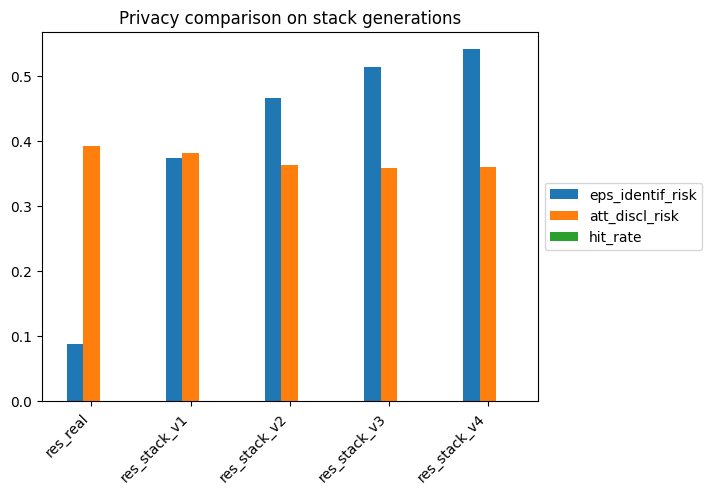

In [30]:
privacy_plot.plot.bar()
plt.title("Privacy comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [31]:
utility_plot = pd.DataFrame(columns=["avg_dwm_diff",
                                     "pca_eigval_diff",
                                     "pca_eigvec_ang"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    utility_plot.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"], 
                                    evals.loc["pca_eigval_diff", "val"],
                                    evals.loc["pca_eigvec_ang", "val"]]

utility_plot

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang
res_real,0.041836,0.154428,0.161921
res_stack_v1,0.023484,0.058266,1.104287
res_stack_v2,0.010810,0.021666,1.480268
res_stack_v3,0.007039,0.004762,1.385693
res_stack_v4,0.001341,0.002194,1.439054


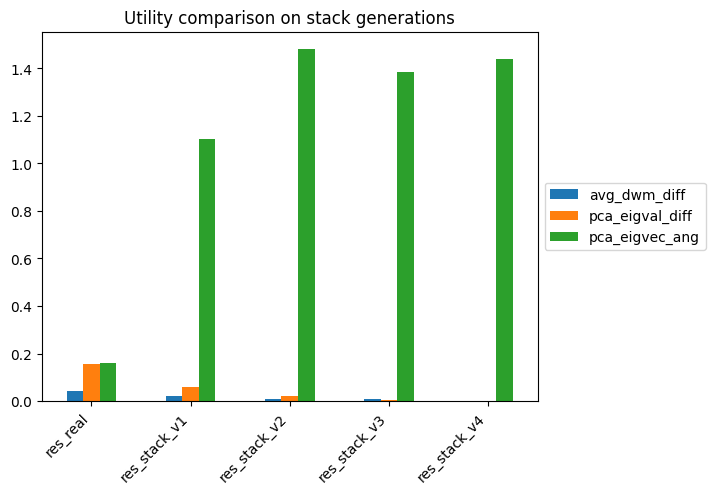

In [32]:
utility_plot.plot.bar()
plt.title("Utility comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [33]:
matrix_diff_plot = pd.DataFrame(columns=["corr_mat_diff",
                                     "mutual_inf_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    matrix_diff_plot.loc[eval_str[i]] = [evals.loc["corr_mat_diff", "val"], 
                                    evals.loc["mutual_inf_diff", "val"]]

matrix_diff_plot

,corr_mat_diff,mutual_inf_diff
res_real,1.335652,0.653307
res_stack_v1,0.485672,0.272219
res_stack_v2,0.276055,0.216847
res_stack_v3,0.090580,0.138677
res_stack_v4,0.046122,0.094066


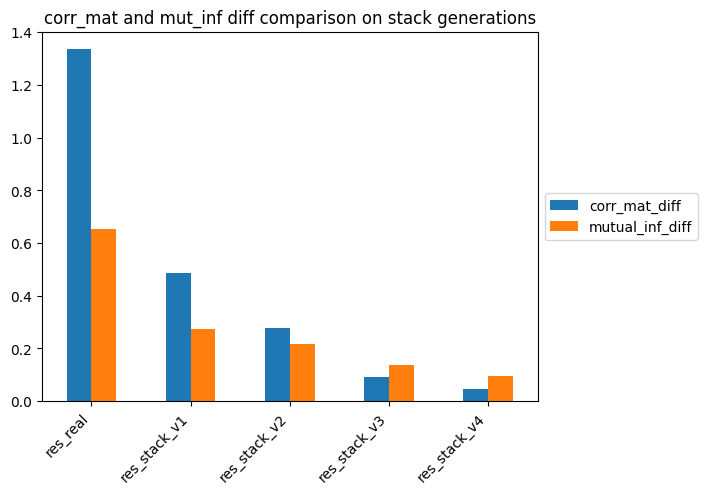

In [34]:
matrix_diff_plot.plot.bar()
plt.title("corr_mat and mut_inf diff comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [35]:
total_eval = pd.DataFrame(columns=["avg_dwm_diff",
                                   "pca_eigval_diff",
                                  "pca_eigvec_ang",
                                  "avg_cio",
                                  "corr_mat_diff",
                                  "mutual_inf_diff",
                                  "ks_tvd_stat",
                                  "frac_ks_sigs",
                                  "avg_h_dist",
                                  "avg_pMSE",
                                  "avg_nndr",
                                  "priv_loss_nndr",
                                  "nnaa",
                                  "priv_loss_nnaa",
                                  "cls_F1_diff",
                                  "cls_F1_diff_hout",
                                  "auroc",
                                  "hit_rate",
                                  "eps_identif_risk",
                                  "mia_cls_risk",
                                  "att_discl_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    total_eval.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"],
                                   evals.loc["pca_eigval_diff", "val"],
                                   evals.loc["pca_eigvec_ang", "val"],
                                   evals.loc["avg_cio", "val"],
                                   evals.loc["corr_mat_diff", "val"],
                                   evals.loc["mutual_inf_diff", "val"],
                                   evals.loc["ks_tvd_stat", "val"],
                                   evals.loc["frac_ks_sigs", "val"],
                                   evals.loc["avg_h_dist", "val"],
                                   evals.loc["avg_pMSE", "val"],
                                   evals.loc["avg_nndr", "val"],
                                   evals.loc["priv_loss_nndr", "val"],
                                   evals.loc["nnaa", "val"],
                                   evals.loc["priv_loss_nnaa", "val"],
                                   evals.loc["cls_F1_diff", "val"],
                                   evals.loc["cls_F1_diff_hout", "val"],
                                   evals.loc["auroc", "val"],
                                   evals.loc["hit_rate", "val"],
                                   evals.loc["eps_identif_risk", "val"],
                                   evals.loc["mia_cls_risk", "val"],
                                   evals.loc["att_discl_risk", "val"]]
total_eval

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang,avg_cio,corr_mat_diff,mutual_inf_diff,ks_tvd_stat,frac_ks_sigs,avg_h_dist,avg_pMSE,...,priv_loss_nndr,nnaa,priv_loss_nnaa,cls_F1_diff,cls_F1_diff_hout,auroc,hit_rate,eps_identif_risk,mia_cls_risk,att_discl_risk
res_real,0.041836,0.154428,0.161921,0.064730,1.335652,0.653307,0.163604,0.750000,0.079329,0.059299,...,-0.007174,0.837395,-0.038095,0.141821,0.111345,0.065649,0.000000,0.088235,0.889076,0.392367
res_stack_v1,0.023484,0.058266,1.104287,0.000000,0.485672,0.272219,0.083854,0.666667,0.034521,0.015647,...,-0.002721,0.614391,-0.040196,0.058692,0.078782,0.025192,0.000000,0.372899,0.827731,0.381758
res_stack_v2,0.010810,0.021666,1.480268,0.106657,0.276055,0.216847,0.030300,0.416667,0.007491,0.001725,...,0.000305,0.567516,-0.011423,0.048774,0.045693,0.048547,0.000525,0.465861,0.942017,0.362115
res_stack_v3,0.007039,0.004762,1.385693,0.105229,0.090580,0.138677,0.012442,0.250000,0.001930,0.000852,...,0.002331,0.528545,-0.011660,0.008337,0.012868,0.019488,0.000000,0.513130,0.982143,0.358561
res_stack_v4,0.001341,0.002194,1.439054,0.594992,0.046122,0.094066,0.004406,0.000000,0.001445,0.000073,...,-0.004882,0.513531,-0.008401,0.004301,0.005383,0.001405,0.000460,0.540507,0.996639,0.359686


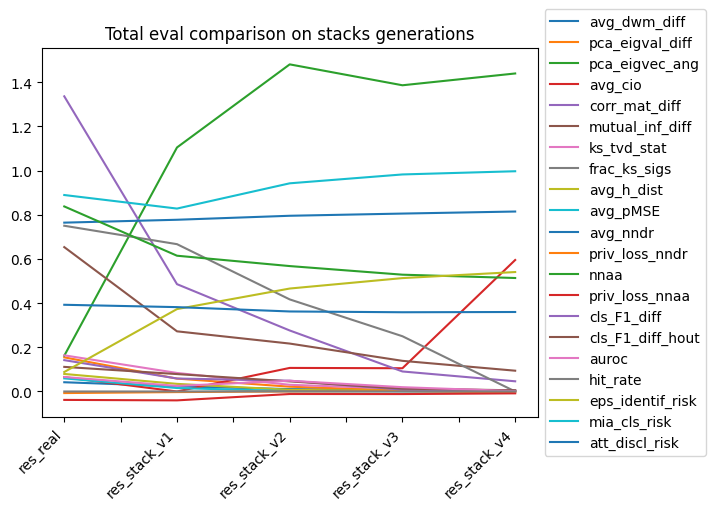

In [36]:
total_eval.plot.line()
plt.title("Total eval comparison on stacks generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [37]:
overall_res = pd.DataFrame({"Stacks": eval_str})

pr_res, ut_res = [], []

for i in range(len(eval_results)):
    pr_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'p']['n_val']))
    ut_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'u']['n_val']))

overall_res["Utility"] = ut_res
overall_res["Privacy"] = pr_res

overall_res

,Stacks,Utility,Privacy
0,res_real,0.742889,0.793637
1,res_stack_v1,0.780755,0.758468
2,res_stack_v2,0.815974,0.729473
3,res_stack_v3,0.843704,0.714903
4,res_stack_v4,0.900036,0.708788


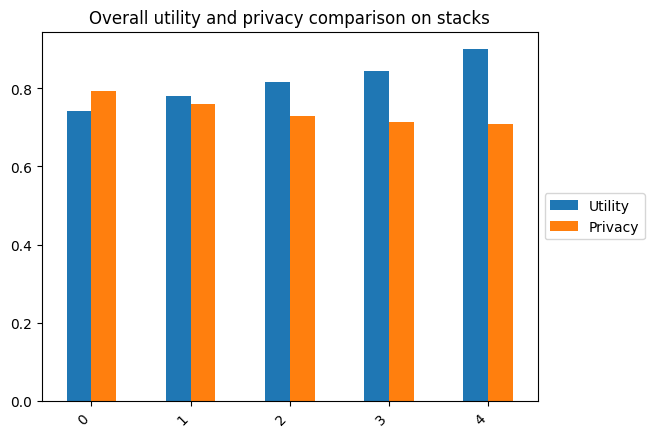

In [38]:
overall_res.plot.bar()
plt.title("Overall utility and privacy comparison on stacks")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# Evaluting final stacks compared to real data

In [39]:
eval_results = [res_real, res_stack_v5_on_real, res_stack_synth_only_on_real]
eval_str = ["res_real", "res_stack_v5_on_real", "res_stack_synth_only_on_real"]

In [40]:
privacy_plot = pd.DataFrame(columns=["eps_identif_risk",
                                     "att_discl_risk",
                                     "hit_rate"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    privacy_plot.loc[eval_str[i]] = [evals.loc["eps_identif_risk", "val"], 
                                    evals.loc["att_discl_risk", "val"],
                                    evals.loc["hit_rate", "val"]]

privacy_plot

,eps_identif_risk,att_discl_risk,hit_rate
res_real,0.088235,0.392367,0.0
res_stack_v5_on_real,0.099790,0.385644,0.0
res_stack_synth_only_on_real,0.074580,0.383543,0.0


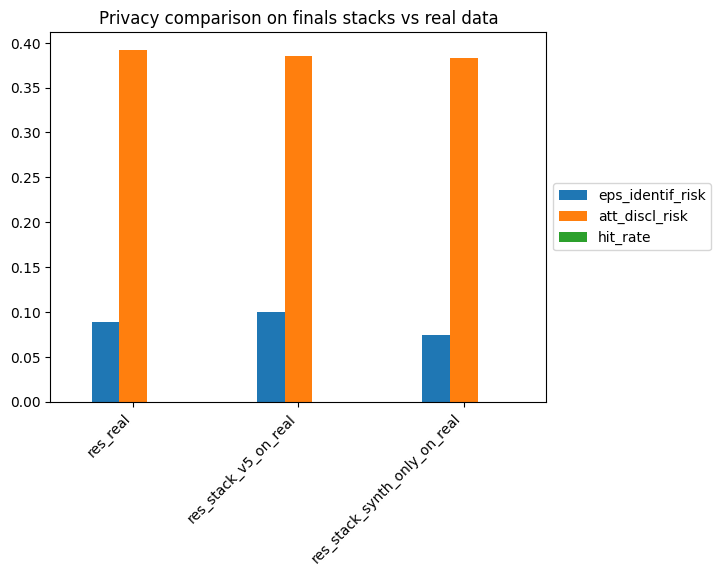

In [41]:
privacy_plot.plot.bar()
plt.title("Privacy comparison on finals stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [42]:
utility_plot = pd.DataFrame(columns=["avg_dwm_diff",
                                     "pca_eigval_diff",
                                     "pca_eigvec_ang"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    utility_plot.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"], 
                                    evals.loc["pca_eigval_diff", "val"],
                                    evals.loc["pca_eigvec_ang", "val"]]

utility_plot

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang
res_real,0.041836,0.154428,0.161921
res_stack_v5_on_real,0.040263,0.156629,1.483524
res_stack_synth_only_on_real,0.039874,0.151938,1.421230


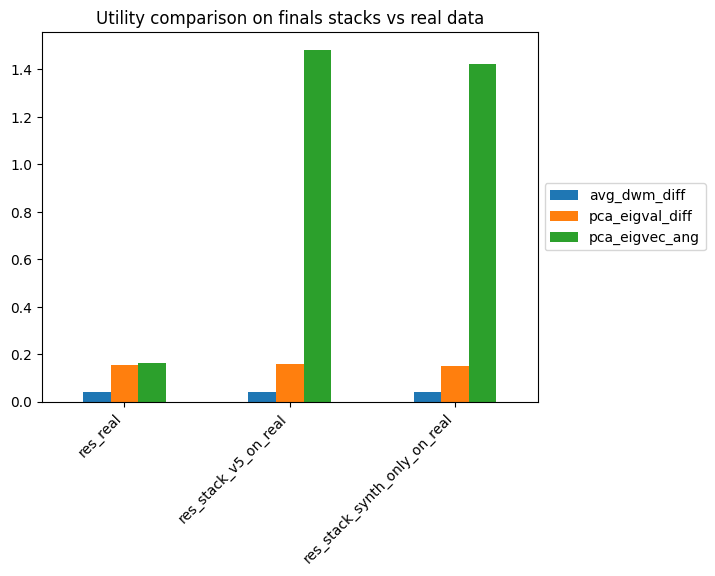

In [43]:
utility_plot.plot.bar()
plt.title("Utility comparison on finals stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [44]:
matrix_diff_plot = pd.DataFrame(columns=["corr_mat_diff",
                                     "mutual_inf_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    matrix_diff_plot.loc[eval_str[i]] = [evals.loc["corr_mat_diff", "val"], 
                                    evals.loc["mutual_inf_diff", "val"]]

matrix_diff_plot

,corr_mat_diff,mutual_inf_diff
res_real,1.335652,0.653307
res_stack_v5_on_real,1.468039,0.684994
res_stack_synth_only_on_real,1.420341,0.681062


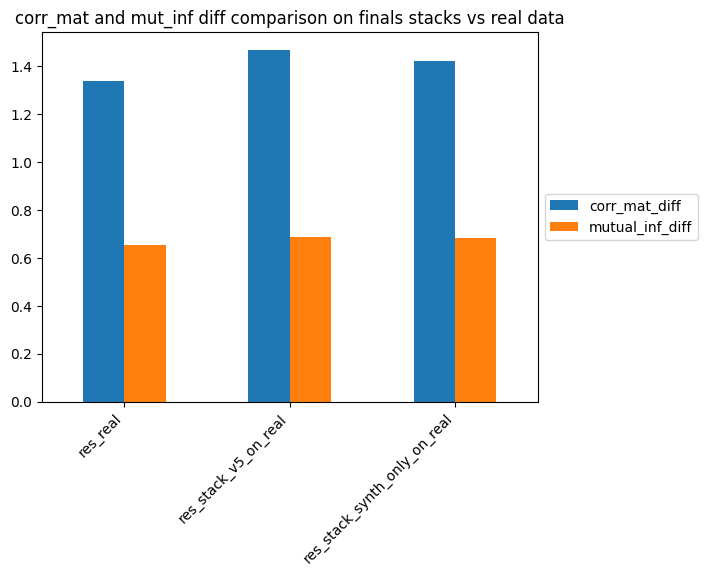

In [45]:
matrix_diff_plot.plot.bar()
plt.title("corr_mat and mut_inf diff comparison on finals stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [46]:
total_eval = pd.DataFrame(columns=["avg_dwm_diff",
                                   "pca_eigval_diff",
                                  "pca_eigvec_ang",
                                  "avg_cio",
                                  "corr_mat_diff",
                                  "mutual_inf_diff",
                                  "ks_tvd_stat",
                                  "frac_ks_sigs",
                                  "avg_h_dist",
                                  "avg_pMSE",
                                  "avg_nndr",
                                  "priv_loss_nndr",
                                  "nnaa",
                                  "priv_loss_nnaa",
                                  "cls_F1_diff",
                                  "cls_F1_diff_hout",
                                  "auroc",
                                  "hit_rate",
                                  "eps_identif_risk",
                                  "mia_cls_risk",
                                  "att_discl_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    total_eval.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"],
                                   evals.loc["pca_eigval_diff", "val"],
                                   evals.loc["pca_eigvec_ang", "val"],
                                   evals.loc["avg_cio", "val"],
                                   evals.loc["corr_mat_diff", "val"],
                                   evals.loc["mutual_inf_diff", "val"],
                                   evals.loc["ks_tvd_stat", "val"],
                                   evals.loc["frac_ks_sigs", "val"],
                                   evals.loc["avg_h_dist", "val"],
                                   evals.loc["avg_pMSE", "val"],
                                   evals.loc["avg_nndr", "val"],
                                   evals.loc["priv_loss_nndr", "val"],
                                   evals.loc["nnaa", "val"],
                                   evals.loc["priv_loss_nnaa", "val"],
                                   evals.loc["cls_F1_diff", "val"],
                                   evals.loc["cls_F1_diff_hout", "val"],
                                   evals.loc["auroc", "val"],
                                   evals.loc["hit_rate", "val"],
                                   evals.loc["eps_identif_risk", "val"],
                                   evals.loc["mia_cls_risk", "val"],
                                   evals.loc["att_discl_risk", "val"]]
total_eval

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang,avg_cio,corr_mat_diff,mutual_inf_diff,ks_tvd_stat,frac_ks_sigs,avg_h_dist,avg_pMSE,...,priv_loss_nndr,nnaa,priv_loss_nnaa,cls_F1_diff,cls_F1_diff_hout,auroc,hit_rate,eps_identif_risk,mia_cls_risk,att_discl_risk
res_real,0.041836,0.154428,0.161921,0.064730,1.335652,0.653307,0.163604,0.750000,0.079329,0.059299,...,-0.007174,0.837395,-0.038095,0.141821,0.111345,0.065649,0.0,0.088235,0.889076,0.392367
res_stack_v5_on_real,0.040263,0.156629,1.483524,0.133136,1.468039,0.684994,0.145980,0.750000,0.067046,0.044737,...,0.010451,0.812500,-0.015441,0.359498,0.297269,0.145202,0.0,0.099790,0.949580,0.385644
res_stack_synth_only_on_real,0.039874,0.151938,1.421230,0.250559,1.420341,0.681062,0.151106,0.833333,0.070174,0.050391,...,0.022516,0.823634,-0.028116,0.273337,0.235294,0.238332,0.0,0.074580,0.954622,0.383543


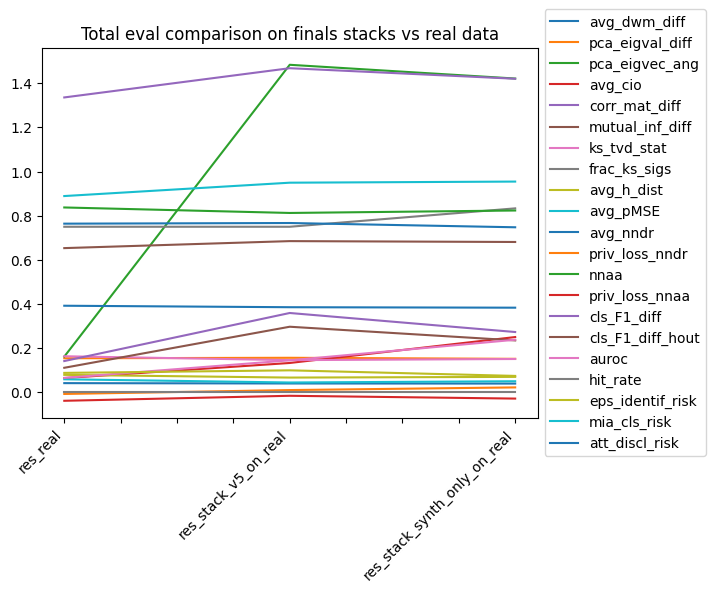

In [47]:
total_eval.plot.line()
plt.title("Total eval comparison on finals stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [48]:
overall_res = pd.DataFrame({"Stacks": eval_str})

pr_res, ut_res = [], []

for i in range(len(eval_results)):
    pr_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'p']['n_val']))
    ut_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'u']['n_val']))

overall_res["Utility"] = ut_res
overall_res["Privacy"] = pr_res

overall_res

,Stacks,Utility,Privacy
0,res_real,0.742889,0.793637
1,res_stack_v5_on_real,0.691068,0.788257
2,res_stack_synth_only_on_real,0.696267,0.785536


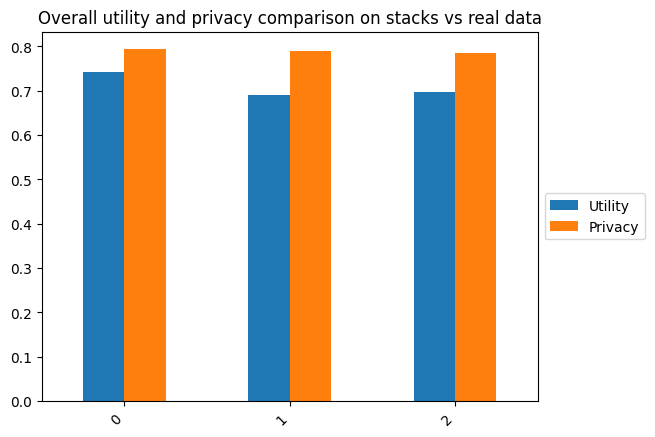

In [49]:
overall_res.plot.bar()
plt.title("Overall utility and privacy comparison on stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()